# Predicting Flight Ticket Prices

# Table of Contents:

### - Introduction


The aim of this project is to develop a machine learning model capable of predicting flight ticket prices accurately. Predicting flight ticket prices is a crucial task in the travel industry, both for travelers seeking the best deals and for airlines and travel agencies optimizing their pricing strategies. By leveraging machine learning techniques, we seek to provide travelers with more accurate price estimates, helping them make informed decisions, while also assisting airlines in setting competitive prices.
This is the main notebook for the flight price prediction project. We predict ticket prices for upcoming flights to help customers in selecting the optimum time for travel and the cheapest flight to the desired destination.

### -Problem Statement

 In this project, we will approach the problem by leveraging historical flight data, including features such as departure and arrival cities, travel dates, airline information, and other relevant factors. We will employ machine learning algorithms to analyze this data and build a predictive model that can estimate flight ticket prices based on input parameters provided by users.

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle
import json
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

### Load and preview the dataset

In [2]:
flight_train_data = pd.read_excel("Data_Train01.xlsx")
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Booking_company
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,IRCTC
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,IRCTC
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,IRCTC
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,IRCTC
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,IRCTC


### EDA and Feature Engineering

In [3]:
flight_train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32049 entries, 0 to 32048
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          32049 non-null  object 
 1   Date_of_Journey  32049 non-null  object 
 2   Source           32049 non-null  object 
 3   Destination      32049 non-null  object 
 4   Route            32046 non-null  object 
 5   Dep_Time         32049 non-null  object 
 6   Arrival_Time     32049 non-null  object 
 7   Duration         32049 non-null  object 
 8   Total_Stops      32046 non-null  object 
 9   Additional_Info  32049 non-null  object 
 10  Price            32049 non-null  float64
 11  Booking_company  32049 non-null  object 
dtypes: float64(1), object(11)
memory usage: 2.9+ MB


In [4]:
flight_train_data.shape

(32049, 12)

In [5]:
flight_train_data.count()

Airline            32049
Date_of_Journey    32049
Source             32049
Destination        32049
Route              32046
Dep_Time           32049
Arrival_Time       32049
Duration           32049
Total_Stops        32046
Additional_Info    32049
Price              32049
Booking_company    32049
dtype: int64

In [6]:
flight_train_data.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Booking_company     object
dtype: object

In [7]:
flight_train_data.describe()

,Price
count,32049.000000
mean,9526.272220
std,4852.017858
min,1759.000000
25%,5591.795000
50%,8748.740000
75%,12898.000000
max,87463.200000


### Handle missing values

In [8]:
flight_train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              3
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        3
Additional_Info    0
Price              0
Booking_company    0
dtype: int64

In [9]:
flight_train_data[flight_train_data['Route'].isna()| flight_train_data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Booking_company
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0,IRCTC
19722,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,8228.0,Goibibo
30405,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7816.6,Makemytrip


In [10]:
flight_train_data.dropna(inplace=True)

In [11]:
flight_train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Booking_company    0
dtype: int64

In [12]:
flight_train_data.shape

(32046, 12)

In [13]:
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Booking_company
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,IRCTC
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,IRCTC
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,IRCTC
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,IRCTC
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,IRCTC


### 1.Duration

In [14]:
flight_train_data=flight_train_data.drop(flight_train_data[flight_train_data["Airline"]== "Jet Airways"].index)
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Booking_company
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,IRCTC
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,IRCTC
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,IRCTC
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,IRCTC
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,IRCTC


In [15]:
flight_train_data=flight_train_data.drop(flight_train_data[flight_train_data["Airline"]== "Jet Airways Business"].index)
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Booking_company
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,IRCTC
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,IRCTC
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,IRCTC
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,IRCTC
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0,IRCTC


In [16]:
flight_train_data.shape

(20481, 12)

#### Duration

In [17]:
def convert_duration(duration):
    if len(duration.split())==2:
        hours=int(duration.split()[0][:-1])
        minutes=int(duration.split()[1][:-1])
        return hours * 60 + minutes
    else:
        return int(duration[:-1])

In [18]:
flight_train_data["Duration"]=flight_train_data["Duration"].apply(convert_duration)
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Booking_company
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897.0,IRCTC
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662.0,IRCTC
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218.0,IRCTC
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302.0,IRCTC
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,145,non-stop,No info,3873.0,IRCTC


### 2. Departure Time And Arrival Time

In [19]:
flight_train_data['Dep_Time'] = pd.to_datetime(flight_train_data['Dep_Time'])
flight_train_data['Arrival_Time'] = pd.to_datetime(flight_train_data['Arrival_Time'])
flight_train_data.head()                                                 
                                               

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Booking_company
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2024-05-10 22:20:00,2024-03-22 01:10:00,170,non-stop,No info,3897.0,IRCTC
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-10 05:50:00,2024-05-10 13:15:00,445,2 stops,No info,7662.0,IRCTC
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2024-05-10 18:05:00,2024-05-10 23:30:00,325,1 stop,No info,6218.0,IRCTC
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2024-05-10 16:50:00,2024-05-10 21:35:00,285,1 stop,No info,13302.0,IRCTC
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,2024-05-10 09:00:00,2024-05-10 11:25:00,145,non-stop,No info,3873.0,IRCTC


In [20]:
flight_train_data["Dep_Time_in_hours"]= pd.to_datetime(flight_train_data["Dep_Time"]).dt.hour
flight_train_data["Dep_Time_in_minutes"]=pd.to_datetime(flight_train_data["Dep_Time"]).dt.minute
flight_train_data["Arrival_Time_in_hours"]= pd.to_datetime(flight_train_data["Arrival_Time"]).dt.hour
flight_train_data["Arrival_Time_in_minutes"]=pd.to_datetime(flight_train_data["Arrival_Time"]).dt.minute
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2024-05-10 22:20:00,2024-03-22 01:10:00,170,non-stop,No info,3897.0,IRCTC,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-05-10 05:50:00,2024-05-10 13:15:00,445,2 stops,No info,7662.0,IRCTC,5,50,13,15
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,2024-05-10 18:05:00,2024-05-10 23:30:00,325,1 stop,No info,6218.0,IRCTC,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,2024-05-10 16:50:00,2024-05-10 21:35:00,285,1 stop,No info,13302.0,IRCTC,16,50,21,35
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,2024-05-10 09:00:00,2024-05-10 11:25:00,145,non-stop,No info,3873.0,IRCTC,9,0,11,25


In [21]:
flight_train_data.drop(["Dep_Time","Arrival_Time"],axis = 1, inplace = True)
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897.0,IRCTC,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662.0,IRCTC,5,50,13,15
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218.0,IRCTC,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302.0,IRCTC,16,50,21,35
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,145,non-stop,No info,3873.0,IRCTC,9,0,11,25


### 3.Date Of Journey

In [22]:
flight_train_data['Date_of_Journey'] = pd.to_datetime(flight_train_data['Date_of_Journey'])
flight_train_data.head()                                                     

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897.0,IRCTC,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662.0,IRCTC,5,50,13,15
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218.0,IRCTC,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302.0,IRCTC,16,50,21,35
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,145,non-stop,No info,3873.0,IRCTC,9,0,11,25


In [23]:
flight_train_data['Date_of_Journey'].dt.year.unique()

array([2019])

In [24]:
flight_train_data['Day'] = pd.to_datetime(flight_train_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
flight_train_data['Month'] = pd.to_datetime(flight_train_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
flight_train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897.0,IRCTC,22,20,1,10,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662.0,IRCTC,5,50,13,15,1,5
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218.0,IRCTC,18,5,23,30,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302.0,IRCTC,16,50,21,35,1,3
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,145,non-stop,No info,3873.0,IRCTC,9,0,11,25,24,6


In [25]:
flight_train_data.drop("Date_of_Journey",axis=1,inplace = True)
flight_train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897.0,IRCTC,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662.0,IRCTC,5,50,13,15,1,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218.0,IRCTC,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302.0,IRCTC,16,50,21,35,1,3
5,SpiceJet,Kolkata,Banglore,CCU → BLR,145,non-stop,No info,3873.0,IRCTC,9,0,11,25,24,6


#### 4.Total Stops

In [26]:
flight_train_data["Total_Stops"].value_counts()

Total_Stops
1 stop      9258
non-stop    8604
2 stops     2481
3 stops      135
4 stops        3
Name: count, dtype: int64

In [27]:
flight_train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
flight_train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897.0,IRCTC,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662.0,IRCTC,5,50,13,15,1,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218.0,IRCTC,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302.0,IRCTC,16,50,21,35,1,3
5,SpiceJet,Kolkata,Banglore,CCU → BLR,145,0,No info,3873.0,IRCTC,9,0,11,25,24,6


### 5.Additional Info

In [28]:
flight_train_data["Additional_Info"].value_counts()

Additional_Info
No info                         19173
No check-in baggage included      960
In-flight meal not included       288
1 Long layover                     21
Change airports                    21
No Info                             9
1 Short layover                     3
Red-eye flight                      3
2 Long layover                      3
Name: count, dtype: int64

In [29]:
flight_train_data.drop(["Additional_Info"],axis = 1, inplace = True)
flight_train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897.0,IRCTC,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662.0,IRCTC,5,50,13,15,1,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218.0,IRCTC,18,5,23,30,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302.0,IRCTC,16,50,21,35,1,3
5,SpiceJet,Kolkata,Banglore,CCU → BLR,145,0,3873.0,IRCTC,9,0,11,25,24,6


In [30]:
flight_train_data.select_dtypes(["object"]).columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Booking_company'], dtype='object')

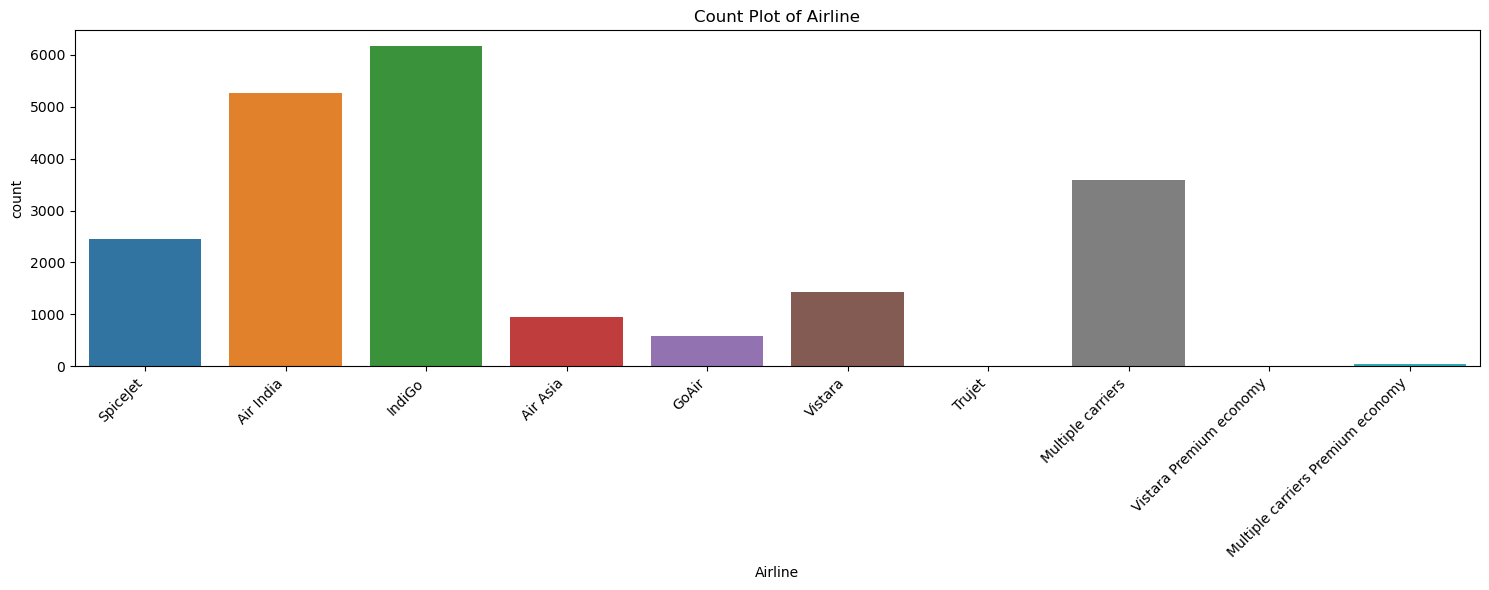

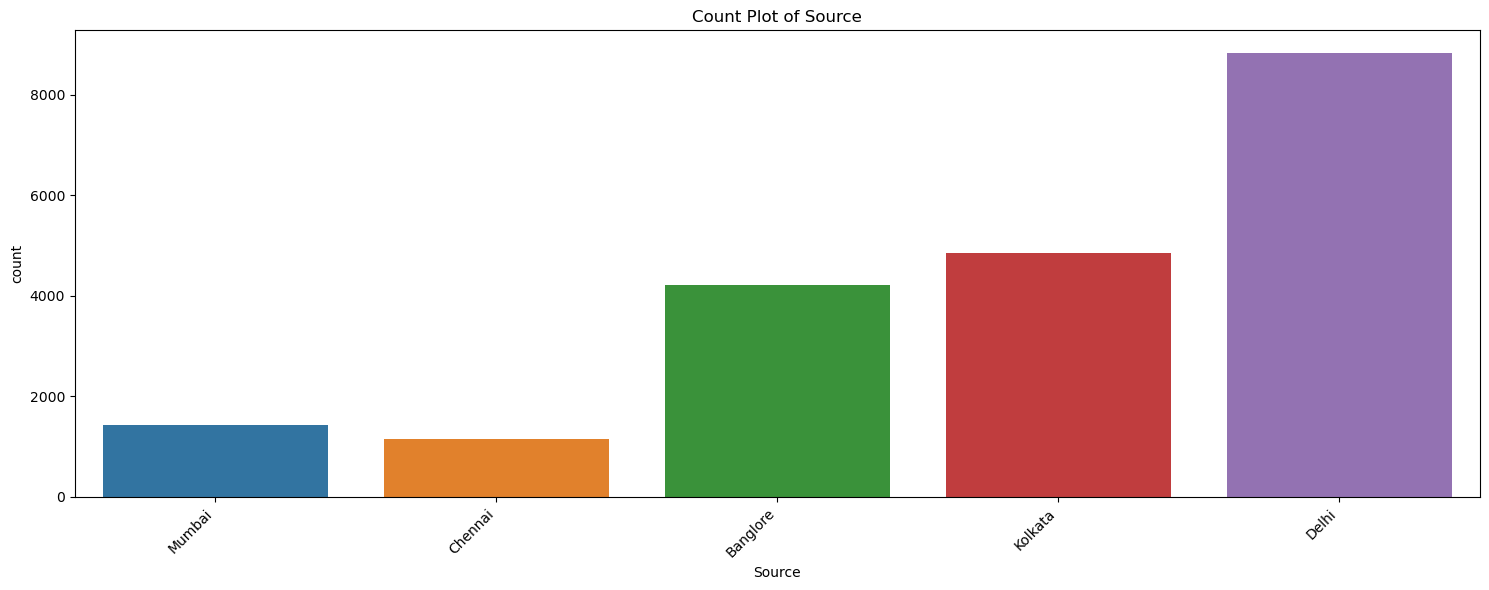

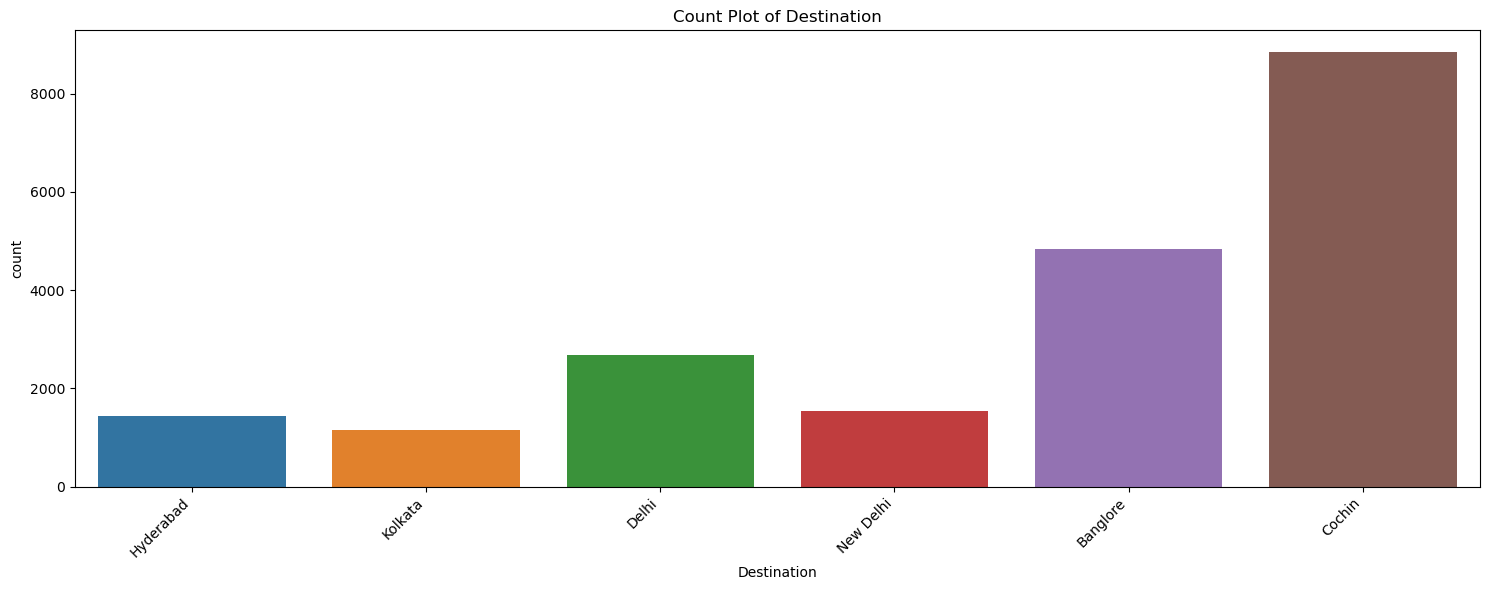

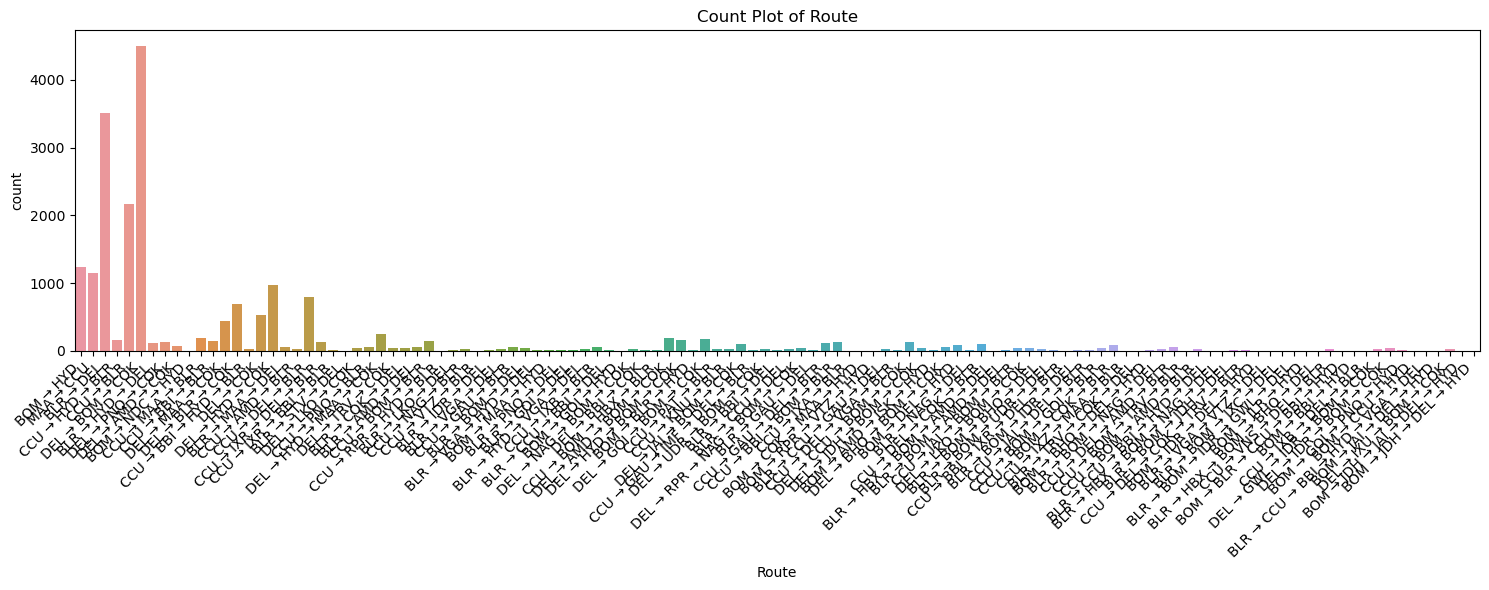

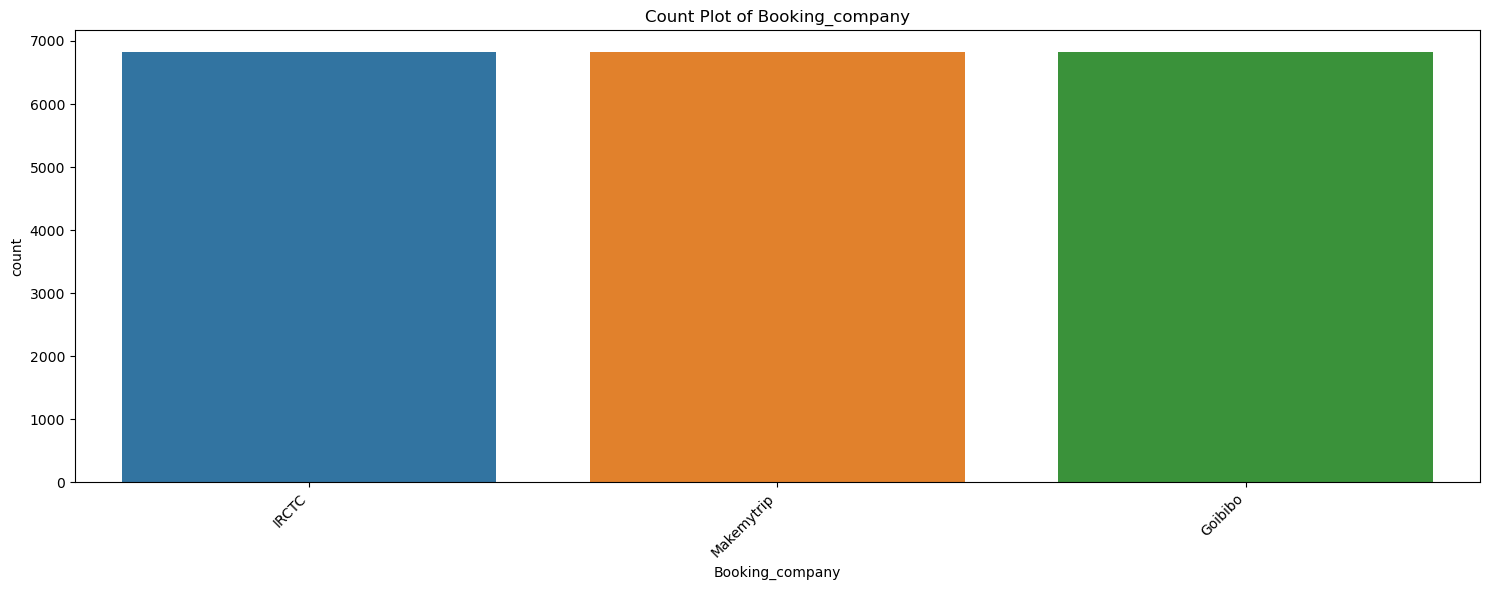

In [31]:
for i in ['Airline', 'Source', 'Destination', 'Route','Booking_company']:
    plt.figure(figsize=(15, 6))
    
    # Sort flight_train_data by "Price" for each category
    sorted_data = flight_train_data.sort_values("Price", ascending=True)
    
    # Create the count plot
    sns.countplot(data=sorted_data, x=i)
    
    # Customize the plot
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.title(f"Count Plot of {i}")
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    print('\n\n')  # Print new lines between plots


### Handling Categorical Data:

### 6. Airline

In [32]:
flight_train_data["Airline"].value_counts()

Airline
IndiGo                               6159
Air India                            5253
Multiple carriers                    3588
SpiceJet                             2454
Vistara                              1437
Air Asia                              957
GoAir                                 582
Multiple carriers Premium economy      39
Vistara Premium economy                 9
Trujet                                  3
Name: count, dtype: int64

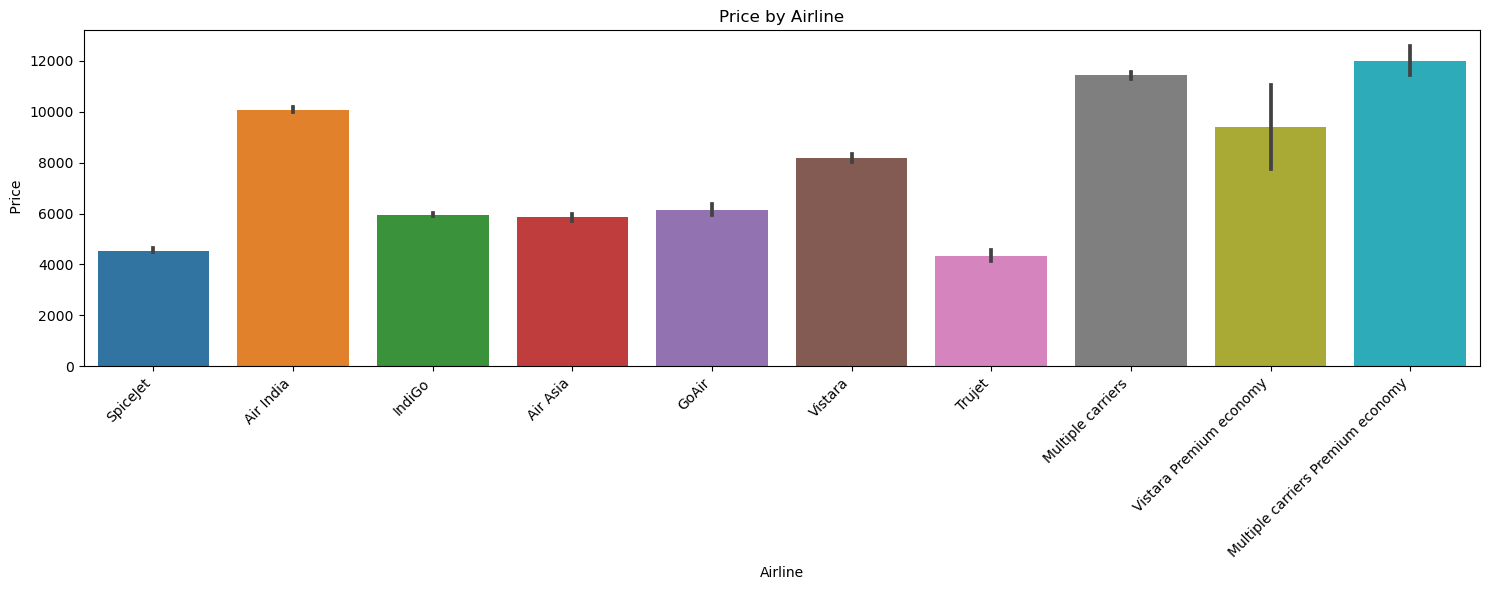

In [33]:
plt.figure(figsize=(15,6))

ax = sns.barplot(x="Airline", y="Price", data=sorted_data)

# Customize x-axis labels rotation and alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.title("Price by Airline")
plt.xlabel("Airline")
plt.ylabel(" Price")
plt.tight_layout()
plt.show()

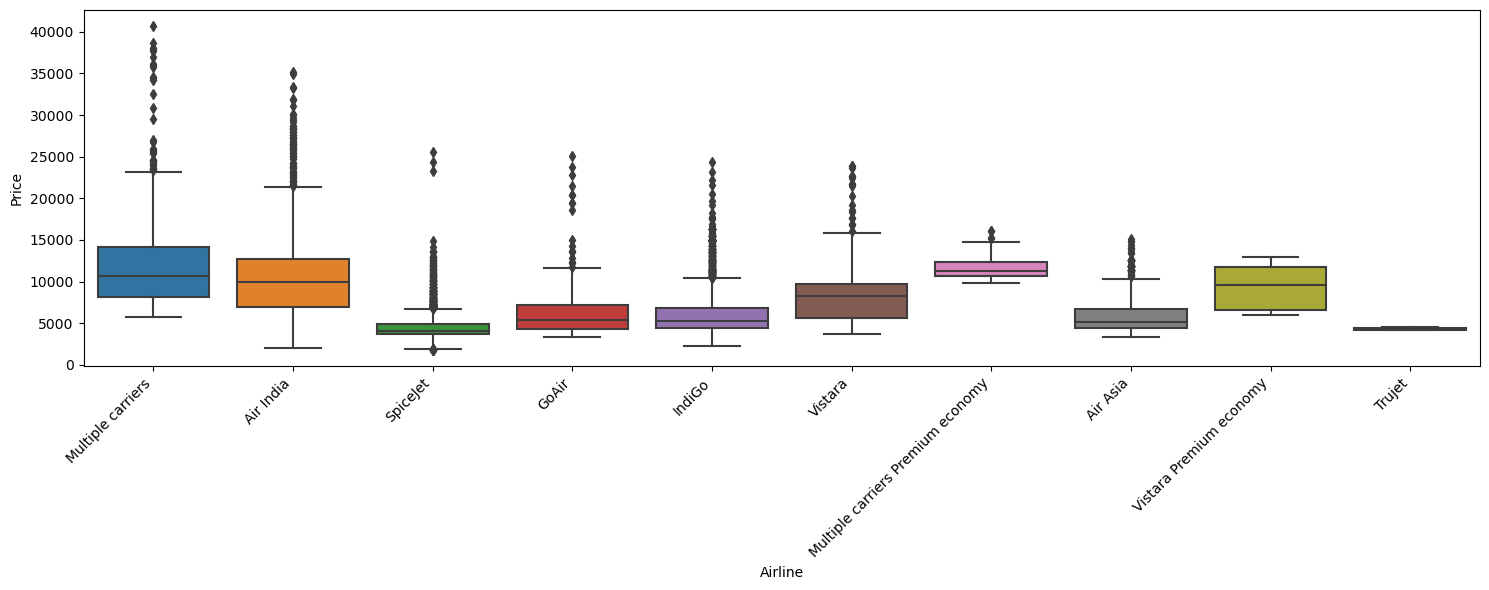

In [34]:
plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="Airline", y="Price",data=flight_train_data.sort_values("Price", ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()    
    

In [35]:
flight_train_data.groupby("Airline").describe()["Price"].sort_values("mean",ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Multiple carriers Premium economy,39.0,11970.757051,1816.159295,9845.0,10723.8725,11269.000,12395.9000,16091.9
Multiple carriers,3588.0,11429.640868,3928.361936,5797.0,8099.0000,10655.865,14198.4150,40681.3
Air India,5253.0,10077.028430,4111.486538,2050.0,6981.6450,9916.000,12751.0000,35139.5
Vistara Premium economy,9.0,9395.512778,2677.232255,5969.0,6565.9000,9535.625,11793.0000,12972.3
Vistara,1437.0,8173.172161,3071.949949,3687.0,5586.0000,8283.715,9765.5250,23903.0
GoAir,582.0,6144.341108,2841.671334,3398.0,4287.8000,5430.350,7230.6175,25073.4
IndiGo,6159.0,5947.910910,2386.302614,2227.0,4453.9000,5301.285,6842.0000,24368.3
Air Asia,957.0,5860.456097,2137.016822,3383.0,4409.0000,5192.000,6767.2000,15151.4
SpiceJet,2454.0,4547.968608,1948.116718,1759.0,3758.8650,4047.285,4957.0000,25593.7


In [36]:
Airline = pd.get_dummies(flight_train_data["Airline"],drop_first= True,dtype=int)
Airline.head()

,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0


In [37]:
flight_train_data=pd.concat([flight_train_data,Airline],axis=1)
flight_train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,...,Month,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897.0,IRCTC,22,20,...,3,0,0,1,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662.0,IRCTC,5,50,...,5,1,0,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218.0,IRCTC,18,5,...,5,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302.0,IRCTC,16,50,...,3,0,0,1,0,0,0,0,0,0
5,SpiceJet,Kolkata,Banglore,CCU → BLR,145,0,3873.0,IRCTC,9,0,...,6,0,0,0,0,0,1,0,0,0


In [38]:
flight_train_data.drop("Airline",axis=1,inplace = True)
flight_train_data.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,...,Month,Air India,GoAir,IndiGo,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,170,0,3897.0,IRCTC,22,20,1,...,3,0,0,1,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662.0,IRCTC,5,50,13,...,5,1,0,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218.0,IRCTC,18,5,23,...,5,0,0,1,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302.0,IRCTC,16,50,21,...,3,0,0,1,0,0,0,0,0,0
5,Kolkata,Banglore,CCU → BLR,145,0,3873.0,IRCTC,9,0,11,...,6,0,0,0,0,0,1,0,0,0


### 7.Source and Destination

In [39]:
flight_train_data["Source"].value_counts()

Source
Delhi       8844
Kolkata     4845
Banglore    4215
Mumbai      1434
Chennai     1143
Name: count, dtype: int64

In [40]:
flight_train_data["Destination"].value_counts()

Destination
Cochin       8844
Banglore     4845
Delhi        2685
New Delhi    1530
Hyderabad    1434
Kolkata      1143
Name: count, dtype: int64

In [41]:

Source = flight_train_data[["Source"]]

Source = pd.get_dummies(Source,drop_first= True,dtype=int)

Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
3,0,0,1,0
4,0,0,0,0
5,0,0,1,0


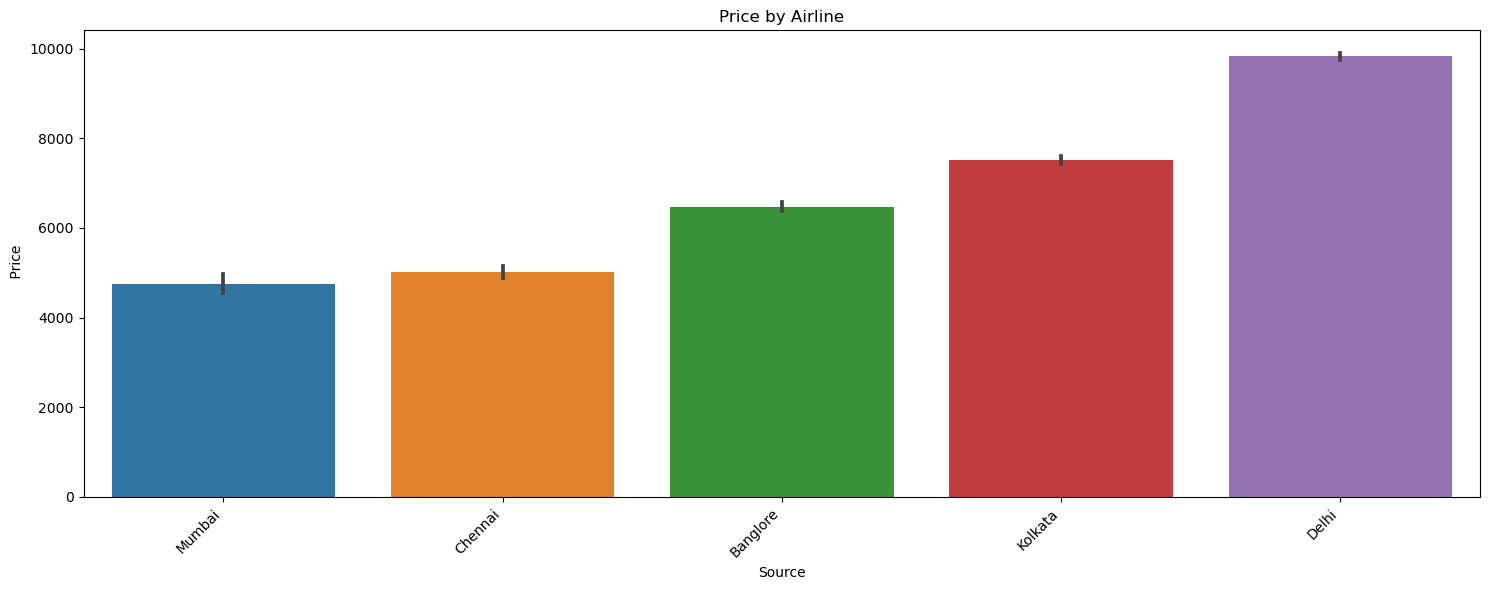

In [42]:
plt.figure(figsize=(15,6))

ax = sns.barplot(x="Source", y="Price", data=sorted_data)

# Customize x-axis labels rotation and alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.title("Price by Airline")
plt.xlabel("Source")
plt.ylabel(" Price")
plt.tight_layout()
plt.show()

In [43]:
flight_train_data=pd.concat([flight_train_data,Source],axis=1)
flight_train_data.head()


,Source,Destination,Route,Duration,Total_Stops,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,Banglore,New Delhi,BLR → DEL,170,0,3897.0,IRCTC,22,20,1,...,0,0,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662.0,IRCTC,5,50,13,...,0,0,0,0,0,0,0,0,1,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218.0,IRCTC,18,5,23,...,0,0,0,0,0,0,0,0,1,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302.0,IRCTC,16,50,21,...,0,0,0,0,0,0,0,0,0,0
5,Kolkata,Banglore,CCU → BLR,145,0,3873.0,IRCTC,9,0,11,...,0,0,1,0,0,0,0,0,1,0


In [44]:

Destination = flight_train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True,dtype=int)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
5,0,0,0,0,0


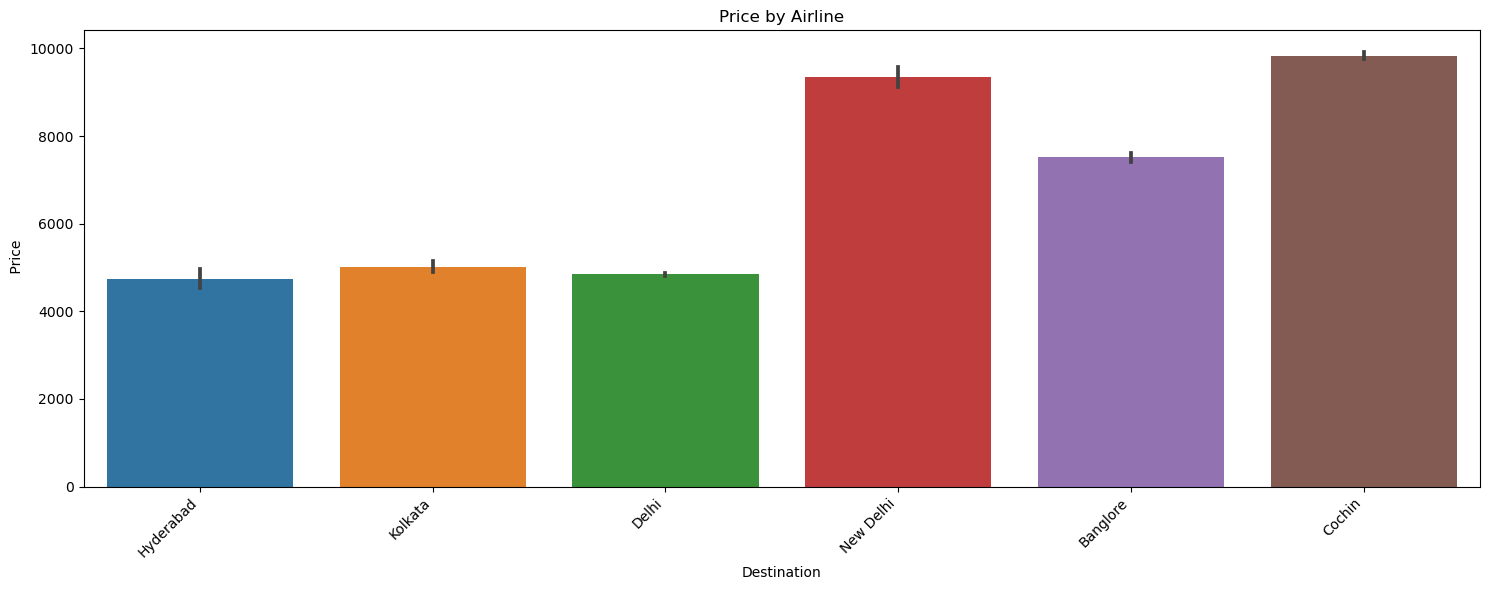

In [45]:
plt.figure(figsize=(15,6))

ax = sns.barplot(x="Destination", y="Price", data=sorted_data)

# Customize x-axis labels rotation and alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.title("Price by Airline")
plt.xlabel("Destination")
plt.ylabel(" Price")
plt.tight_layout()
plt.show()

In [46]:
flight_train_data=pd.concat([flight_train_data,Destination],axis=1)
flight_train_data.head()


,Source,Destination,Route,Duration,Total_Stops,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Banglore,New Delhi,BLR → DEL,170,0,3897.0,IRCTC,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662.0,IRCTC,5,50,13,...,0,0,0,1,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218.0,IRCTC,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302.0,IRCTC,16,50,21,...,0,0,0,0,0,0,0,0,0,1
5,Kolkata,Banglore,CCU → BLR,145,0,3873.0,IRCTC,9,0,11,...,0,0,0,1,0,0,0,0,0,0


In [47]:
flight_train_data.drop("Source",axis=1,inplace = True)
flight_train_data.head()

,Destination,Route,Duration,Total_Stops,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,New Delhi,BLR → DEL,170,0,3897.0,IRCTC,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Banglore,CCU → IXR → BBI → BLR,445,2,7662.0,IRCTC,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
3,Banglore,CCU → NAG → BLR,325,1,6218.0,IRCTC,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,New Delhi,BLR → NAG → DEL,285,1,13302.0,IRCTC,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1
5,Banglore,CCU → BLR,145,0,3873.0,IRCTC,9,0,11,25,...,0,0,0,1,0,0,0,0,0,0


In [48]:
flight_train_data.drop("Destination",axis=1,inplace = True)
flight_train_data.head()

,Route,Duration,Total_Stops,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897.0,IRCTC,22,20,1,10,24,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2,7662.0,IRCTC,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
3,CCU → NAG → BLR,325,1,6218.0,IRCTC,18,5,23,30,12,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,285,1,13302.0,IRCTC,16,50,21,35,1,...,0,0,0,0,0,0,0,0,0,1
5,CCU → BLR,145,0,3873.0,IRCTC,9,0,11,25,24,...,0,0,0,1,0,0,0,0,0,0


### 8.Booking_company

In [49]:
flight_train_data.replace({"IRCTC": 0, "Goibibo": 1, "Makemytrip": 2}, inplace = True)
flight_train_data.head()

,Route,Duration,Total_Stops,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897.0,0,22,20,1,10,24,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2,7662.0,0,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
3,CCU → NAG → BLR,325,1,6218.0,0,18,5,23,30,12,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,285,1,13302.0,0,16,50,21,35,1,...,0,0,0,0,0,0,0,0,0,1
5,CCU → BLR,145,0,3873.0,0,9,0,11,25,24,...,0,0,0,1,0,0,0,0,0,0


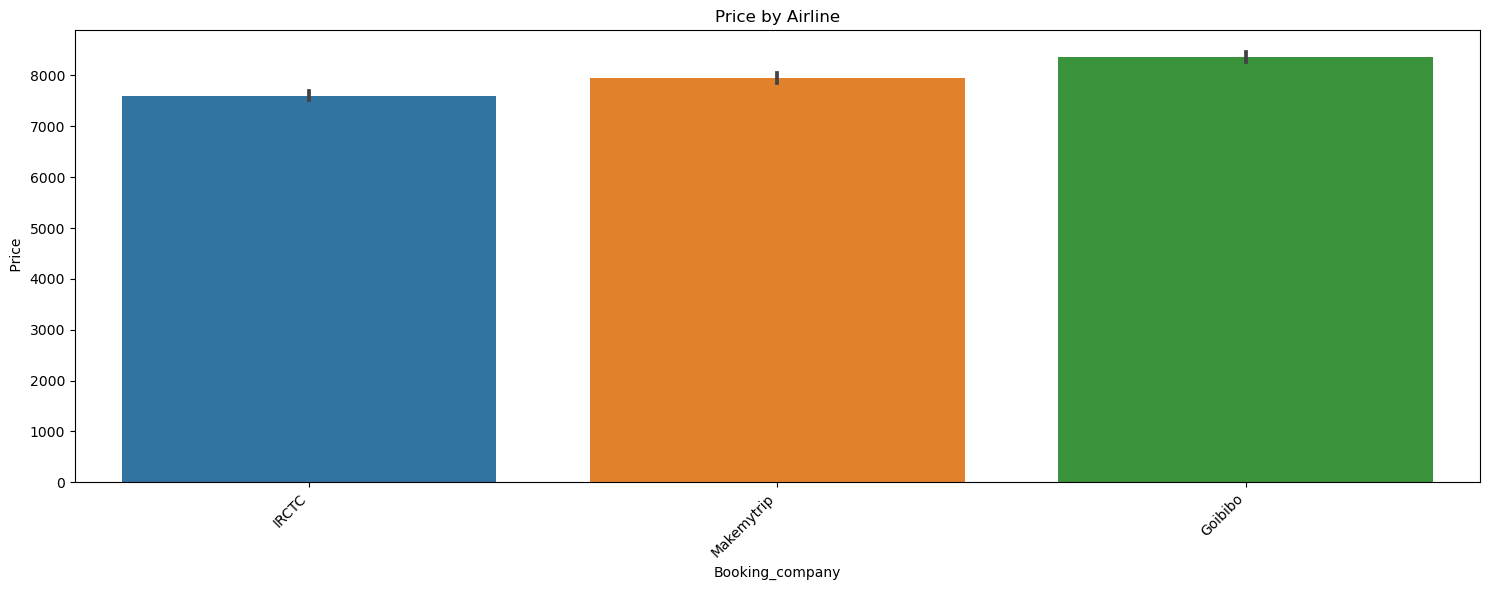

In [50]:
plt.figure(figsize=(15,6))

ax = sns.barplot(x="Booking_company", y="Price", data=sorted_data)

# Customize x-axis labels rotation and alignment
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.title("Price by Airline")
plt.xlabel("Booking_company")
plt.ylabel(" Price")
plt.tight_layout()
plt.show()

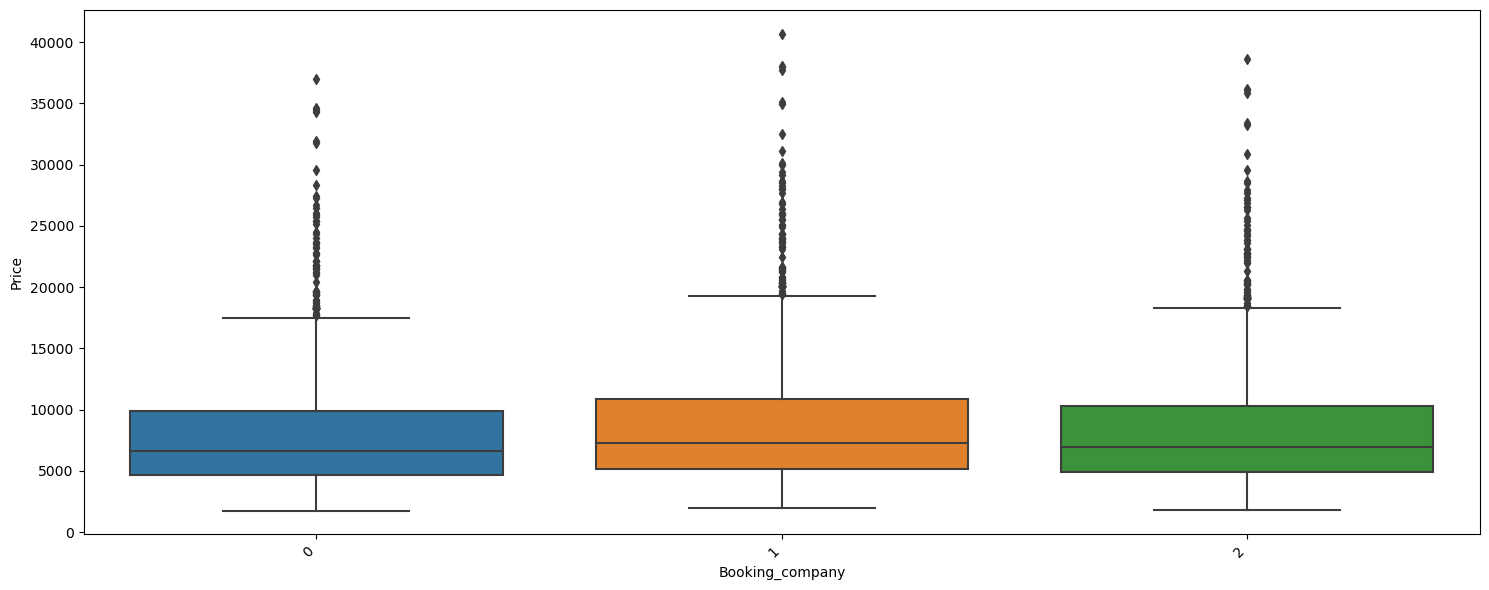

In [51]:
plt.figure(figsize=(15, 6))
ax = sns.boxplot(x="Booking_company", y="Price",data=flight_train_data.sort_values("Price", ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()    
    

### 9.Route

In [52]:
flight_train_data.drop("Route",axis=1,inplace= True)
flight_train_data.head()

,Duration,Total_Stops,Price,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897.0,0,22,20,1,10,24,3,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662.0,0,5,50,13,15,1,5,...,0,0,0,1,0,0,0,0,0,0
3,325,1,6218.0,0,18,5,23,30,12,5,...,0,0,0,1,0,0,0,0,0,0
4,285,1,13302.0,0,16,50,21,35,1,3,...,0,0,0,0,0,0,0,0,0,1
5,145,0,3873.0,0,9,0,11,25,24,6,...,0,0,0,1,0,0,0,0,0,0


In [53]:
flight_train_data.shape

(20481, 28)

### Testing Dataset

### Load and preview the dataset

In [54]:
flight_test_data = pd.read_excel("Test_set01.xlsx")
flight_test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Booking_company
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,IRCTC
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,IRCTC
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,IRCTC
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,IRCTC
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,IRCTC
...,...,...,...,...,...,...,...,...,...,...,...
8008,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,Goibibo
8009,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,Goibibo
8010,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,Goibibo
8011,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,Goibibo


### EDA and Feature Engineering

In [55]:
flight_test_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8013 entries, 0 to 8012
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          8013 non-null   object
 1   Date_of_Journey  8013 non-null   object
 2   Source           8013 non-null   object
 3   Destination      8013 non-null   object
 4   Route            8013 non-null   object
 5   Dep_Time         8013 non-null   object
 6   Arrival_Time     8013 non-null   object
 7   Duration         8013 non-null   object
 8   Total_Stops      8013 non-null   object
 9   Additional_Info  8013 non-null   object
 10  Booking_company  8013 non-null   object
dtypes: object(11)
memory usage: 688.7+ KB


In [56]:
flight_test_data.count()

Airline            8013
Date_of_Journey    8013
Source             8013
Destination        8013
Route              8013
Dep_Time           8013
Arrival_Time       8013
Duration           8013
Total_Stops        8013
Additional_Info    8013
Booking_company    8013
dtype: int64

In [57]:
flight_test_data.shape

(8013, 11)

In [58]:
flight_test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Booking_company    object
dtype: object

In [59]:
flight_test_data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Booking_company
count,8013,8013,8013,8013,8013,8013,8013,8013,8013,8013,8013
unique,11,44,5,6,100,199,704,320,5,6,3
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info,IRCTC
freq,2691,432,3435,3435,1872,186,339,366,4293,6444,2671


In [60]:
flight_test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Booking_company    0
dtype: int64

In [61]:
flight_test_data[flight_test_data['Route'].isna()| flight_test_data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Booking_company


In [62]:
flight_test_data.dropna(inplace=True)

In [63]:
flight_test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Booking_company    0
dtype: int64

In [64]:
flight_test_data.drop(["Dep_Time","Arrival_Time"],axis = 1, inplace = True)
flight_test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Booking_company
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,IRCTC
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,IRCTC
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,IRCTC
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,IRCTC
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,IRCTC


In [65]:
#flight_test_data['Date_of_Journey'] = pd.to_datetime(flight_test_data['Date_of_Journey'])
#flight_test_data.head()


In [66]:
flight_test_data['Day'] = pd.to_datetime(flight_test_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
flight_test_data['Month'] = pd.to_datetime(flight_test_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
flight_test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Booking_company,Day,Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,IRCTC,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,IRCTC,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,IRCTC,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,IRCTC,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,IRCTC,24,6


In [67]:
flight_test_data.drop("Date_of_Journey",axis=1,inplace = True)
flight_test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Booking_company,Day,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,IRCTC,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,IRCTC,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,IRCTC,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,IRCTC,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,IRCTC,24,6


In [68]:
flight_test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
flight_test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Booking_company,Day,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,No info,IRCTC,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,No info,IRCTC,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,In-flight meal not included,IRCTC,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,No info,IRCTC,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,IRCTC,24,6


In [69]:
flight_test_data.drop(["Additional_Info"],axis = 1, inplace = True)
flight_test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Booking_company,Day,Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,IRCTC,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,IRCTC,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,IRCTC,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,IRCTC,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,IRCTC,24,6


In [70]:
Airline = pd.get_dummies(flight_test_data["Airline"],drop_first= True,dtype=int)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [71]:
flight_test_data=pd.concat([flight_test_data,Airline],axis=1)
flight_test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Booking_company,Day,Month,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,IRCTC,6,6,0,0,0,1,0,0,0,0,0,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,IRCTC,12,5,0,0,1,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,IRCTC,21,5,0,0,0,1,0,0,0,0,0,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,IRCTC,21,5,0,0,0,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,0,IRCTC,24,6,0,0,0,0,0,0,0,0,0,0


In [72]:
flight_test_data.drop("Airline",axis=1,inplace = True)
flight_test_data.head()

,Source,Destination,Route,Duration,Total_Stops,Booking_company,Day,Month,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,IRCTC,6,6,0,0,0,1,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → MAA → BLR,4h,1,IRCTC,12,5,0,0,1,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,IRCTC,21,5,0,0,0,1,0,0,0,0,0,0
3,Delhi,Cochin,DEL → BOM → COK,13h,1,IRCTC,21,5,0,0,0,0,0,1,0,0,0,0
4,Banglore,Delhi,BLR → DEL,2h 50m,0,IRCTC,24,6,0,0,0,0,0,0,0,0,0,0


In [73]:
Source = flight_test_data[["Source"]]

Source = pd.get_dummies(Source,drop_first= True,dtype=int)
flight_test_data=pd.concat([flight_test_data,Source],axis=1)
flight_test_data.head()



,Source,Destination,Route,Duration,Total_Stops,Booking_company,Day,Month,Air India,GoAir,...,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,IRCTC,6,6,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Kolkata,Banglore,CCU → MAA → BLR,4h,1,IRCTC,12,5,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,IRCTC,21,5,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Delhi,Cochin,DEL → BOM → COK,13h,1,IRCTC,21,5,0,0,...,0,1,0,0,0,0,0,1,0,0
4,Banglore,Delhi,BLR → DEL,2h 50m,0,IRCTC,24,6,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
Destination = flight_test_data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True,dtype=int)
flight_test_data=pd.concat([flight_test_data,Destination],axis=1)
flight_test_data.head()


,Source,Destination,Route,Duration,Total_Stops,Booking_company,Day,Month,Air India,GoAir,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,IRCTC,6,6,0,0,...,0,0,1,0,0,1,0,0,0,0
1,Kolkata,Banglore,CCU → MAA → BLR,4h,1,IRCTC,12,5,0,0,...,0,0,0,1,0,0,0,0,0,0
2,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,IRCTC,21,5,0,0,...,0,0,1,0,0,1,0,0,0,0
3,Delhi,Cochin,DEL → BOM → COK,13h,1,IRCTC,21,5,0,0,...,0,0,1,0,0,1,0,0,0,0
4,Banglore,Delhi,BLR → DEL,2h 50m,0,IRCTC,24,6,0,0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
flight_test_data.drop("Source",axis=1,inplace = True)


In [76]:
flight_test_data.drop("Destination",axis=1,inplace = True)
flight_test_data.head()

,Route,Duration,Total_Stops,Booking_company,Day,Month,Air India,GoAir,IndiGo,Jet Airways,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,10h 55m,1,IRCTC,6,6,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,4h,1,IRCTC,12,5,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,DEL → BOM → COK,23h 45m,1,IRCTC,21,5,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,DEL → BOM → COK,13h,1,IRCTC,21,5,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,BLR → DEL,2h 50m,0,IRCTC,24,6,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [77]:
flight_test_data.replace({"IRCTC": 0, "Goibibo": 1, "Makemytrip": 2}, inplace = True)
flight_test_data.head()

,Route,Duration,Total_Stops,Booking_company,Day,Month,Air India,GoAir,IndiGo,Jet Airways,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,DEL → BOM → COK,10h 55m,1,0,6,6,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,4h,1,0,12,5,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,DEL → BOM → COK,23h 45m,1,0,21,5,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,DEL → BOM → COK,13h,1,0,21,5,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,BLR → DEL,2h 50m,0,0,24,6,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [78]:
flight_test_data.shape

(8013, 25)

### Splitting the dataset into features and target variable

In [79]:
flight_train_data.columns

Index(['Duration', 'Total_Stops', 'Price', 'Booking_company',
       'Dep_Time_in_hours', 'Dep_Time_in_minutes', 'Arrival_Time_in_hours',
       'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir',
       'IndiGo', 'Multiple carriers', 'Multiple carriers Premium economy',
       'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [80]:
flight_train_data.shape

(20481, 28)

In [81]:

x = flight_train_data.loc[:,['Duration', 'Total_Stops','Booking_company', 'Dep_Time_in_hours',
       'Dep_Time_in_minutes', 'Arrival_Time_in_hours',
       'Arrival_Time_in_minutes', 'Day', 'Month', 'Air India', 'GoAir',
       'IndiGo', 'Multiple carriers', 'Multiple carriers Premium economy',
       'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Duration,Total_Stops,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,0,22,20,1,10,24,3,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,0,5,50,13,15,1,5,1,...,0,0,0,1,0,0,0,0,0,0
3,325,1,0,18,5,23,30,12,5,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1,0,16,50,21,35,1,3,0,...,0,0,0,0,0,0,0,0,0,1
5,145,0,0,9,0,11,25,24,6,0,...,0,0,0,1,0,0,0,0,0,0


In [82]:
y = flight_train_data.iloc[:, 2]
y.head()

0     3897.0
1     7662.0
3     6218.0
4    13302.0
5     3873.0
Name: Price, dtype: float64

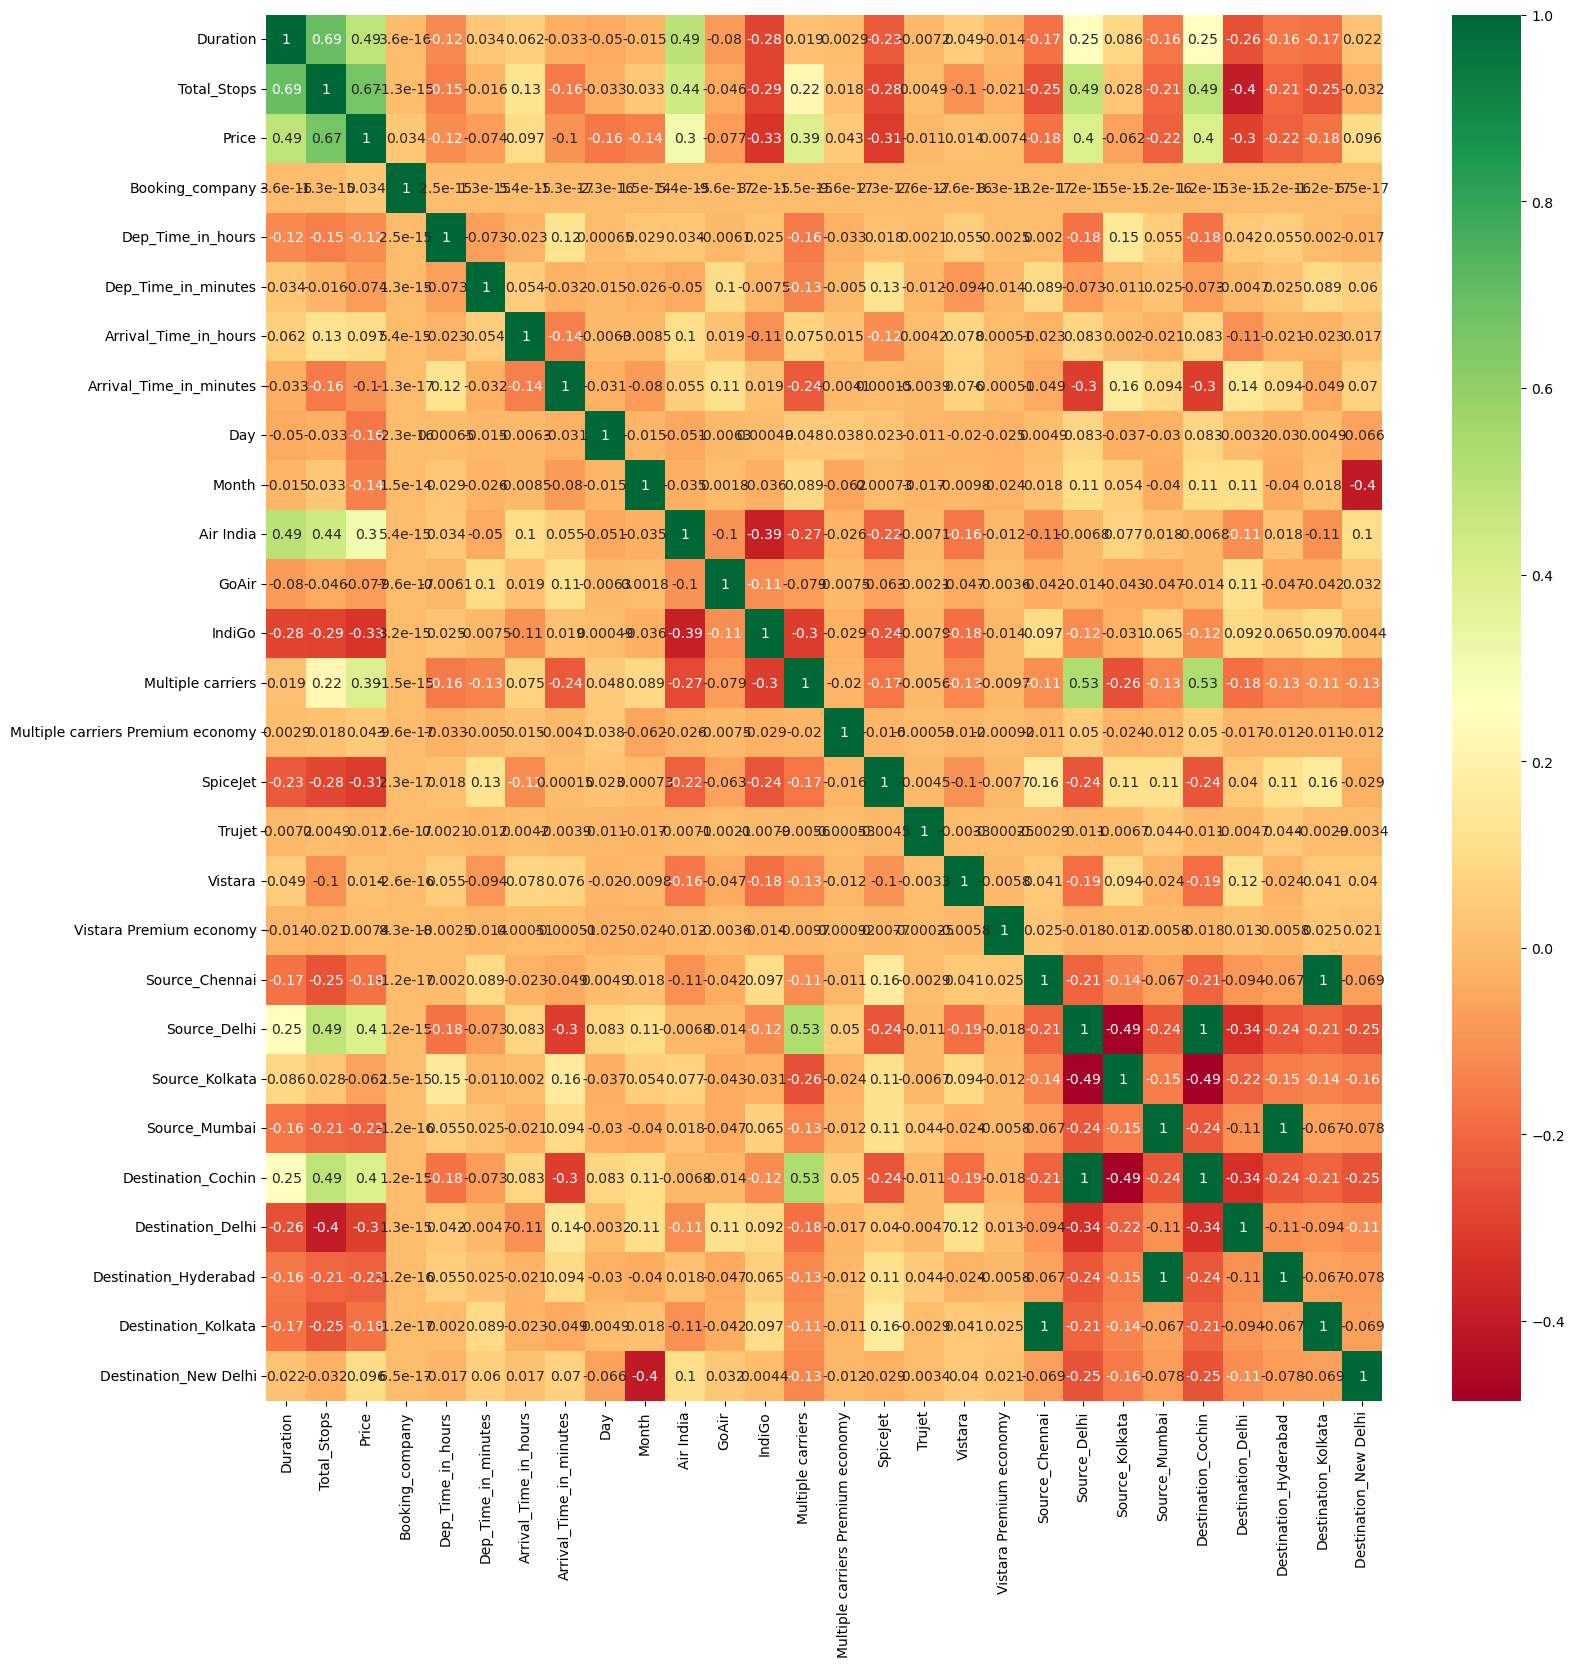

In [83]:
plt.figure(figsize = (18,18))
sns.heatmap(flight_train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

### Splitting the dataset into training and testing sets

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### Linear Regression Model Training

In [85]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

### Predicting using Linear Regression Model

In [86]:
y_pred = lr_model.predict(x_test)

### Visualizing the Predicted vs Actual Values using Scatter Plot

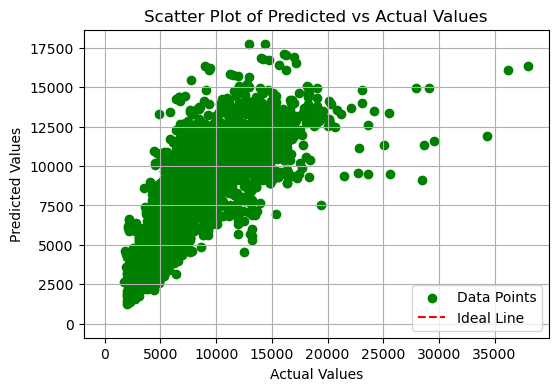

In [87]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='green', label='Data Points')

plt.plot([0, 5], [0, 5], color='red', linestyle='--', label='Ideal Line')

plt.title('Scatter Plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Improved Scatter Plot of Predicted vs Actual Values

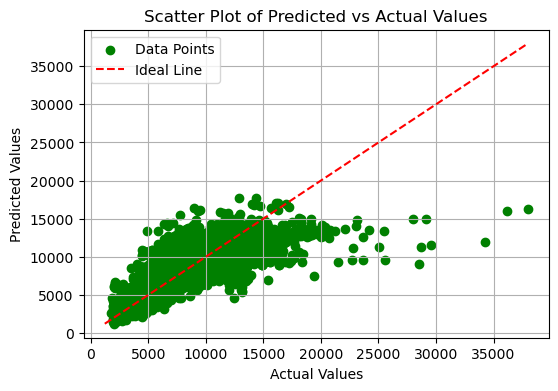

In [88]:
import matplotlib.pyplot as plt
import numpy as np
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='green', label='Data Points')

plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Scatter Plot of Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

### Scatter Plot of Predicted vs Actual Values


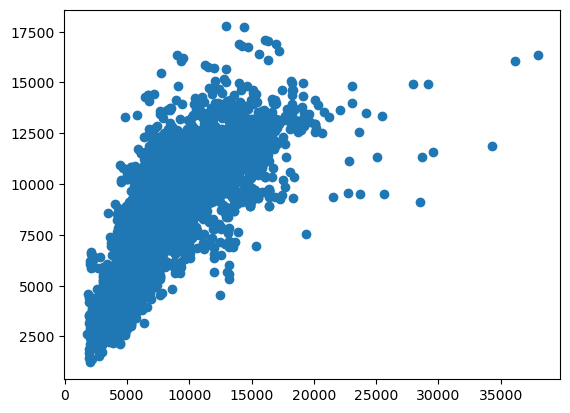

In [89]:
plt.scatter(y_test, y_pred)
plt.show()

### Evaluation Matrix

In [90]:
y_pred_train = lr_model.predict(x_train) # y_train
mse = mean_squared_error(y_train,y_pred_train)
print("Mean sqaured error is",mse)
mae = mean_absolute_error(y_train,y_pred_train)
print("mean absolue error\n",mae)

r2 = r2_score(y_train,y_pred_train)
print("r2 value is ",r2)

adj_r2 = 1 - (((1-r2)*(x_train.shape[0]-1))/(x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score is ",adj_r2)

Mean sqaured error is 6427748.401480562
mean absolue error
 1745.0365667282172
r2 value is  0.6128068966775841
adjusted r2 score is  0.6121677297792163


In [91]:
mse = mean_squared_error(y_test,y_pred)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_test,y_pred)
print("mean absolue error\n",mae)

r2 = r2_score(y_test,y_pred)
print("r2 score is ",r2)

adj_r2 = 1 - (((1-r2)*(x_test.shape[0]-1))/(x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2)

mean squared error
 5995776.933789071
mean absolue error
 1716.5894065238294
r2 score is  0.6302798048831577
adjusted r2 score 0.6278265128536284


### Feature Scaling

In [92]:
std_scalar = StandardScaler()
std_scalar.fit(x_train) # traning
array = std_scalar.transform(x_train)
std_scalar_x_train = pd.DataFrame(array,columns=x_train.columns)
std_scalar_x_train.head()

,Duration,Total_Stops,Booking_company,Dep_Time_in_hours,Dep_Time_in_minutes,Arrival_Time_in_hours,Arrival_Time_in_minutes,Day,Month,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2.412212,1.846385,-1.223624,0.706066,0.857680,0.769266,-0.621879,1.213929,1.143698,1.704856,...,-0.022102,-0.242786,1.147779,-0.554695,-0.276675,1.147779,-0.387815,-0.276675,-0.242786,-0.286148
1,0.771088,0.410980,-1.223624,0.706066,1.124513,-1.044471,0.580135,1.213929,1.143698,-0.586560,...,-0.022102,-0.242786,1.147779,-0.554695,-0.276675,1.147779,-0.387815,-0.276675,-0.242786,-0.286148
2,-0.698415,-1.024426,0.001046,-1.234697,-0.476485,-0.904953,0.880638,-1.243499,0.291529,-0.586560,...,-0.022102,4.118848,-0.871248,-0.554695,-0.276675,-0.871248,-0.387815,-0.276675,4.118848,-0.286148
3,-0.676962,-1.024426,1.225717,-1.411130,0.857680,-0.904953,-0.621879,0.511807,1.143698,-0.586560,...,-0.022102,-0.242786,-0.871248,1.802794,-0.276675,-0.871248,-0.387815,-0.276675,-0.242786,-0.286148
4,-0.953701,1.846385,0.001046,0.882499,-0.476485,0.769266,-0.621879,-0.892438,1.143698,1.704856,...,-0.022102,-0.242786,1.147779,-0.554695,-0.276675,1.147779,-0.387815,-0.276675,-0.242786,-0.286148


In [93]:

lr_model.fit(std_scalar_x_train, y_train)
y_train_pred = lr_model.predict(std_scalar_x_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Training Set Metrics:")
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("R-squared (R2) Score:", r2_train)

Training Set Metrics:
Mean Squared Error (MSE): 6427750.638177408
Root Mean Squared Error (RMSE): 2535.3008969701027
Mean Absolute Error (MAE): 1745.0598369622433
R-squared (R2) Score: 0.612806761943998


In [94]:
std_scalar_x_test = std_scalar.transform(x_test)

y_test_pred = lr_model.predict(std_scalar_x_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Metrics:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R2) Score:", r2_test)


Test Set Metrics:
Mean Squared Error (MSE): 5995765.008435899
Root Mean Squared Error (RMSE): 2448.625126154655
Mean Absolute Error (MAE): 1716.6225928415581
R-squared (R2) Score: 0.6302805402413857


In [95]:
x_train.shape

(16384, 27)

#### Ridge

In [96]:
ridge_model = Ridge(alpha=1.0) #  alpha=1. = lambda
ridge_model.fit(x_train,y_train)

Ridge()

In [97]:
# on training data
y_pred_train  = ridge_model.predict(x_train) # y_train
mse = mean_squared_error(y_train,y_pred_train)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mean absolue error\n",mae)

r2 = r2_score(y_train,y_pred_train)
print("r2 score is ",r2)

mean squared error
 6427983.818104348
mean absolue error
 1745.105784341849
r2 score is  0.6127927157097794


In [98]:
# On testing data
y_pred_test  = ridge_model.predict(x_test) # y_test
mse = mean_squared_error(y_test,y_pred_test)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mean absolue error\n",mae)

r2 = r2_score(y_test,y_pred_test)
print("r2 score is ",r2)

mean squared error
 5996262.925627226
mean absolue error
 1716.81060857427
r2 score is  0.6302498369575307


### Lasso

In [99]:
lasso_model = Lasso(alpha=1.0) #  alpha=1. = lambda
lasso_model.fit(x_train,y_train)

Lasso()

In [100]:
# on training data
y_pred_train  = lasso_model.predict(x_train) # y_train
mse = mean_squared_error(y_train,y_pred_train)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_train,y_pred_train)
print("mean absolue error\n",mae)

r2 = r2_score(y_train,y_pred_train)
print("r2 score is ",r2)

mean squared error
 6431957.186595907
mean absolue error
 1745.6711663144174
r2 score is  0.6125533689306591


In [101]:
# On testing data
y_pred_test  = lasso_model.predict(x_test) # y_test
mse = mean_squared_error(y_test,y_pred_test)
print("mean squared error\n",mse)

mae = mean_absolute_error(y_test,y_pred_test)
print("mean absolue error\n",mae)

r2 = r2_score(y_test,y_pred_test)
print("r2 score is ",r2)


mean squared error
 6001592.938794462
mean absolue error
 1717.4298644373
r2 score is  0.6299211700424792


In [102]:
import pickle

with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model,f)